## 3.2 Спроектувати i розробити нейронну мережу на основi набору даних Cifar10

### Імпортуємо значення набору даних MNIST з пакету keras. Вхідні дані мають розмір у 60 000 екземплярів та розширення у 32 * 32 пікселів.

In [1]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape, X_test.shape

2023-03-23 23:56:44.358344: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-23 23:56:44.812032: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-23 23:56:44.812058: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-23 23:56:46.736264: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

((50000, 32, 32, 3), (10000, 32, 32, 3))

*Завантаження датасету Cifar10*

### Змінимо розмірність y_train, оскільки він є двовимірним масивом, у якому кожен рядок має лише один елемент. Тож приберемо цю незручність і перетворимо його в одновимірний масив.

In [2]:
print(y_train[:4])
y_train = y_train.reshape(-1,)
y_test = y_test
print(y_train[:4])

[[6]
 [9]
 [9]
 [4]]
[6 9 9 4]


*Перетворення y_train в одновимірний масив*

### Позначимо індекси для кращого розуміння, що кожне число в y_train означає.

In [3]:
indexes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

*Індекси, тобто імена класів*

### Переглянемо перші 25 зображень та відповідні їм індекси за допомогою модуля matplotlib.pyplot.

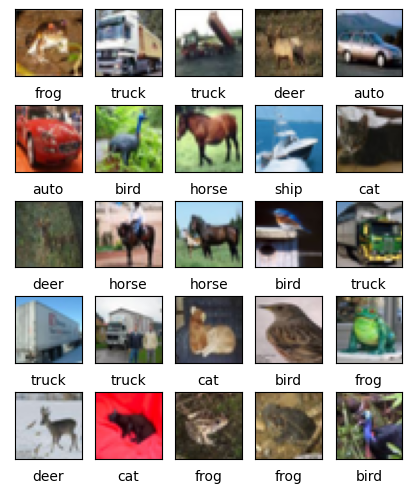

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 6))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(indexes[y_train[i]])

*Зображення перших двадцяти п'яти елементів*

### Нормалізовуємо датасет, щоб отримати значення в інтервалі від [0, 1]. Оскільки маємо колір, то треба розділити кожний з елементів на 255.

In [5]:
X_train = X_train / 255
X_test = X_test / 255

*Нормалізація даних*

### За архітектуру моделі оберемо Sequential. Використаємо щільні шари, де кожен нейрон одного шару зв  язаний з нейроном іншого. Прихований шар маює по 64 нейрони. Оскільки у нас є 10 індексів, то і вихідний шар міститиме 10 нейронів.

 ### Функціями активації є relu та softmax. Використаємо Flatten для перетворення багатовимірних вхідних данних до одновимірних. 

### Використаємо паттерн CNN( Convolutional Neural Network ) - це мережа, яка є одним із методів класифікації та розпізнавання зображень у нейронних мережах. Вона призначена для обробки даних кількома шарами масивів. Цей тип нейронної мережі використовується в таких програмах, як розпізнавання зображень. Основна відмінність між CNN та іншими нейронними мережами полягає в тому, що CNN приймає вхідні дані як двовимірний масив. І він працює безпосередньо з зображеннями, а не зосереджується на виділенні ознак, як це роблять інші нейронні мережі.

### Convolutional Neural Networks мають 4 шари: convolutional, relu шар, pooling, fully connected.

### Початковий крок у вилученні функцій із вхідного зображення виконується згортковим шаром( convolutional layer ). Використовуючи вхідну матрицю, згортковий рівень підтримує зв’язок між пікселями під час вивчення характеристик зображення. Цей математичний процес включає два входи: матрицю зображення та ядро або фільтр.

### Функція активації Rectified Linear Unit (ReLU) запускає вузол лише тоді, коли вхід перевищує певний поріг. Коли вхід нижче нуля, вихід дорівнює нулю; однак, як тільки він перевищує поріг, він зберігає лінійний зв'язок із залежною змінною.

### Під час попередньої обробки зображення шар об’єднання( pooling layer ) є ключовим компонентом, який допомагає зменшити параметри зображення, коли воно стає надмірно великим. Це «зменшення масштабу» зображення досягається шляхом об’єднання, яке можна розглядати як стиснення зображення для зменшення його щільності, подібно до його зменшення.

### Максимальне об’єднання( max pooling ) — це процес дискретизації на основі вибірки. Основна мета максимального об’єднання полягає в тому, щоб зменшити масштаб представлення вхідних даних, зменшивши його розмірність і дозволивши зробити припущення щодо функції, що міститься в групуванні підобласті.

In [6]:
from keras import models, layers
network = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3),
                  activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3,3),
                  activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

2023-03-23 23:56:53.144096: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-23 23:56:53.144646: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-23 23:56:53.144687: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (localhost): /proc/driver/nvidia/version does not exist
2023-03-23 23:56:53.145674: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-23 23:56:53.215730: W tensorflow/tsl/framework/cpu_allocator_impl.

*Побудова архітектури моделі*

### Скомпілюємо мережу, привівши її до сумісного вигляду із TensorFlow. Налаштуємо оптимізатор, функцію втрат, метрики.

### 

In [9]:
network.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

*Компіляція моделі*

### Навчання моделі.

In [10]:
network.fit(X_train, y_train, epochs=5)

2023-03-23 23:57:40.448729: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/5
1563/1563 [==============================] - 122s 78ms/step - loss: 1.8093 - accuracy: 0.3537
Epoch 2/5
1563/1563 [==============================] - 116s 74ms/step - loss: 1.6225 - accuracy: 0.4265
Epoch 3/5
1563/1563 [==============================] - 116s 74ms/step - loss: 1.5424 - accuracy: 0.4557
Epoch 4/5
1563/1563 [==============================] - 118s 75ms/step - loss: 1.4815 - accuracy: 0.4783
Epoch 5/5
1563/1563 [==============================] - 118s 75ms/step - loss: 1.4324 - accuracy: 0.4956


*Навчання моделі*

### Перевіремо модель на контрольному наборі даних.

In [11]:
test_loss, test_acc = network.evaluate(X_test, y_test)

313/313 [==============================] - 6s 19ms/step - loss: 1.5189 - accuracy: 0.4467


*Перевірка моделі*

### Зробимо збереження моделі командою model.save у форматі HDF5, що містить архітектуру, ваги, конфігурацію тренувань, стан оптимізатора.

In [ ]:
network.save('my_model.h5')

*Збереження моделі*

### Завантажуємо модель з файлу.

In [ ]:
from keras.models import load_model
model = load_model('my_model.h5')

*Завантаження моделі*